## Figure 3.Pan- and core- genome infer strain-specifc-GEMs
A. Workflow for ssGEM reconstruction   
B. panYeast update  
C. ssGEM size  
D. ssGEM carbon substrate utilization simulation  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import scipy.stats as stats

# set work directory
os.chdir(r'D:\code\github\Unified_Yeast_GEMs_Database')

In [2]:
# set figure parameters
# set the font size of the figure
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.linewidth'] = 1

axis_fontdict={'fontsize':8,'fontweight':'bold'}
label_fontdict={'fontsize':10,'fontweight':'bold'}
title_fontdict={'fontsize':12,'fontweight':'bold'}

colors_set=sns.color_palette('Dark2')
colors_set

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

### Figure 3A.Workflow for ssGEMs reconstruction
(draw in PPT)

### Figure 3B. panYeast comparision

In [3]:
# inpute data
df_panYeast=pd.DataFrame(index=['Yeast8','pan-GEMs-1011','pan-GEMs-1807 '])
rxnnumb_list=[3963,4042,4027]
genenumb_list=[1139,1370,1236]
metnumb_list=[2691,2766,2766]

df_panYeast['rxnnumb']=rxnnumb_list
df_panYeast['genenumb']=genenumb_list
df_panYeast['metnumb']=metnumb_list

df_panYeast


,rxnnumb,genenumb,metnumb
Yeast8,3963,1139,2691
pan-GEMs-1011,4042,1370,2766
pan-GEMs-1807,4027,1236,2766


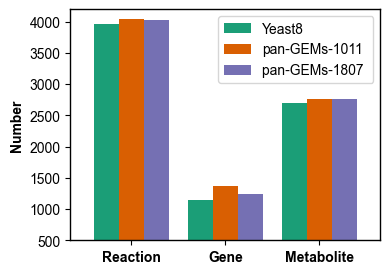

In [6]:
#plot bar plot to compare the size
fig,ax=plt.subplots(figsize=(4,3))
# plt.style.use('seaborn-paper')
df_panYeast.T.plot.bar(ax=ax,
                       rot=0,
                       width=0.8,
                       color=colors_set)
# set x ticks
ax.set_xticks(range(len(df_panYeast.columns)),labels=['Reaction','Gene','Metabolite'],fontsize=10,fontweight='bold')
# set y label
ax.set_ylabel('Number',fontdict=label_fontdict)
# set title
# ax.set_title('PanYeast size comparison',fontdict=title_fontdict)

# set y lim
ax.set_ylim(500,4200)
plt.show()
# save figure
fig.savefig('figures/output/figure3_panYeast_size.svg',dpi=400,bbox_inches='tight',transparent=True)

### Figure 3C.ssGEMs size evaluation

In [3]:
# load data
df_ssGEM_result=pd.read_csv(r'result/model_simulation/df_ssGEMs_size.csv',index_col=0)
df_ssGEM_result

# sort according to type
df_ssGEM_result=df_ssGEM_result.sort_values(by=['type'])
clades_order=df_ssGEM_result['type'].unique()
clades_strain_numb=df_ssGEM_result['type'].value_counts()
clades_strain_numb=clades_strain_numb[clades_order]
clades_strain_numb

type
Bakery           48
Beer            165
Bioethanol       39
Cider            17
Dairy            27
Distillery       31
Fermentation    256
Human           164
Industrial       31
Insect           21
Lab              18
Sake             54
Soil             39
Unknown         107
Wild            377
Wine            413
Name: count, dtype: int64

C:\Users\wangh\AppData\Local\Temp\ipykernel_8996\3729084872.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ssGEM_result,y='gene_numb',x='type',ax=axes[2],showfliers=False,order=clades_order,palette=sns.color_palette("hls", 16))
C:\Users\wangh\AppData\Local\Temp\ipykernel_8996\3729084872.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_ssGEM_result,y='rxn_numb',x='type',ax=axes[1],showfliers=False,order=clades_order,palette=sns.color_palette("hls", 16))
C:\Users\wangh\AppData\Local\Temp\ipykernel_8996\3729084872.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

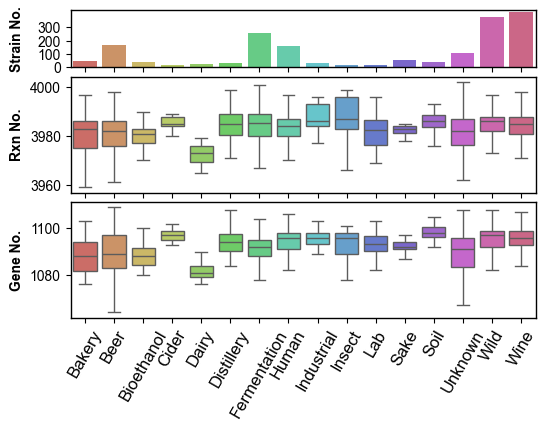

In [16]:
fig,axes=plt.subplots(3,1,figsize=(6,4),sharex=True,gridspec_kw={'height_ratios':[1,2,2]})
# plt.style.use('seaborn-paper')

# set space between subplots
plt.subplots_adjust(hspace=0.1)

# box plot for ssGEMs gene number
# display each bar evploying distinct colors
color_set=sns.color_palette('tab10')
sns.boxplot(data=df_ssGEM_result,y='gene_numb',x='type',ax=axes[2],showfliers=False,order=clades_order,palette=sns.color_palette("hls", 16))
# set y axis label
axes[2].set_ylabel('Gene No.',fontdict=label_fontdict)
# rotate x axis ticklabels
axes[2].tick_params(axis='x',rotation=60,labelsize=12)
# set x axis label
axes[2].set_xlabel('')

# box plot for ssGEMs rxn number
sns.boxplot(data=df_ssGEM_result,y='rxn_numb',x='type',ax=axes[1],showfliers=False,order=clades_order,palette=sns.color_palette("hls", 16))
# set y axis label
axes[1].set_ylabel('Rxn No.',fontdict=label_fontdict)
# don't show x axis label and ticklabels
# axes[1].set_xlabel('')
# axes[1].set_xticklabels('')

# bar plot for ssGEMs clade number
sns.barplot(x=clades_strain_numb.index.tolist(),y=clades_strain_numb,ax=axes[0],order=clades_order,palette=sns.color_palette("hls", 16))
# set y axis, and set the position
axes[0].set_ylabel('Strain No.',fontdict=label_fontdict)
# set position for y axis label
axes[0].yaxis.set_label_coords(-0.1,0.5)
# set y axis ticklabels
axes[0].set_yticks([0,100,200,300])
# add text to bar plot
# axes[0].text(x=-0.2,y=300,s='Strain number',fontdict=label_fontdict)

# add title
# fig.suptitle('1807 ssGEMs size evaluation',fontsize=12,fontweight='bold',y=0.95)

# save figure
plt.savefig('figures/output/figure3_ssGEM_size.svg',dpi=400,bbox_inches='tight',transparent=True)
plt.show()

### Figure 3D.Prediction of Diverse Carbon Substrate Utilization

In [6]:
# load data
df_substrate_score=pd.read_excel("result/model_simulation/ssGEM_substrates_prediction_result.xlsx",index_col=0,sheet_name='F1_score')
df_substrate_score

,F1 score,Accuracy,Precision,Sensitivity,Specificity
ssGEMs(CEN.PK&ethanol red),0.787234,0.672131,0.822222,0.755102,0.333333
CEN_PK,0.744186,0.639344,0.711111,0.780488,0.350000
Ethanol red,0.823529,0.704918,0.933333,0.736842,0.250000
yeastGEM,0.800000,0.688525,0.808511,0.791667,0.307692


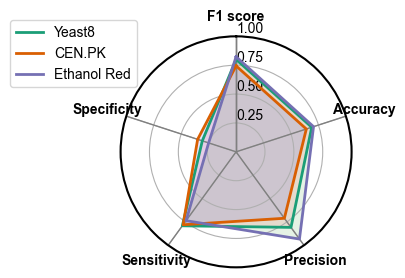

In [7]:
from math import pi
# plot radar chart
fig,ax=plt.subplots(figsize=(4,3),subplot_kw=dict(polar=True,frameon=True))
# plt.style.use('seaborn-paper')

# number of variable
categories=df_substrate_score.columns.tolist()
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axis per variable + add labels, set the label position,and set axis line color
plt.xticks(angles[:-1], categories, size=10,fontweight="bold",color="black")
# set x axis line color
ax.spines['polar'].set_color('black')
ax.spines['polar'].set_linewidth(1.5)

# Draw ylabels
ax.set_rlabel_position(0) 
plt.yticks([0.25,0.50,0.75,1.00], size=10)
plt.ylim(0, 1)

# plot 5 line x=angles,y=1
for angle in angles:
    ax.plot([angle, angle], [0, 1], linewidth=1, linestyle='solid', color='grey')

# Ind1
values = df_substrate_score.loc["yeastGEM"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Yeast8",color=colors_set[0])
ax.fill(angles, values, 'red', alpha=0.1)

# Ind2
values = df_substrate_score.loc["CEN_PK"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="CEN.PK",color=colors_set[1])
ax.fill(angles, values, 'blue', alpha=0.1)

# Ind3
values = df_substrate_score.loc["Ethanol red"].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=2, linestyle='solid', label="Ethanol Red",color=colors_set[2])
ax.fill(angles, values, 'green', alpha=0.1)

# set legend for ax
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 1.1),fontsize=10,ncol=1,frameon=True)

# set title
# plt.title("Prediction of Carbon Sources Utilization",fontsize=12,fontweight="bold",color="black")
plt.show()
# save figure
fig.savefig("figures/output/figure3_ssGEM_substrate_prediction.svg",dpi=400,bbox_inches="tight",transparent=True)

- additional figure. rxn number-gene number

In [28]:
df_ssGEM_result

,gene_numb,rxn_numb,aerobic_growth,aerobic_rxns,anaerobic_growth,anaerobic_rxns,type
GCA_001738485.1_ASM173848v1_genomic,1097,3989,0.000000,165,0.000000,146,Bakery
CHI_4.re,1088,3984,0.076754,491,0.000000,0,Bakery
CHL_4.re,1088,3985,0.085957,508,0.022774,481,Bakery
CHM_4.re,1096,3997,0.087940,490,0.022774,490,Bakery
CHN_4.re,1083,3973,0.000000,22,0.000000,0,Bakery
...,...,...,...,...,...,...,...
GCA_001671165.1_ASM167116v1_genomic,1097,3988,0.087940,456,0.022774,489,Wine
GCA_001671195.1_ASM167119v1_genomic,1094,3982,0.085957,503,0.022774,479,Wine
GCA_001671225.1_ASM167122v1_genomic,1092,3977,0.085957,473,0.022774,482,Wine
GCA_001670385.1_ASM167038v1_genomic,1094,3980,0.085957,477,0.022774,485,Wine


In [29]:
df_ssGEM_result.describe()

,gene_numb,rxn_numb,aerobic_growth,aerobic_rxns,anaerobic_growth,anaerobic_rxns
count,1807.000000,1807.000000,1805.000000,1807.000000,1807.000000,1807.000000
mean,1093.015495,3983.328168,0.074245,430.141118,0.017528,368.629773
std,8.847219,10.678022,0.030453,152.301762,0.009554,193.723255
min,1053.000000,3794.000000,0.000000,19.000000,0.000000,0.000000
25%,1089.000000,3980.000000,0.085957,469.000000,0.022774,446.000000
50%,1095.000000,3985.000000,0.087940,488.000000,0.022774,469.000000
75%,1098.000000,3988.000000,0.087940,501.000000,0.022774,481.000000
max,1186.000000,4025.000000,0.087940,564.000000,0.022774,559.000000


The pearson correlation coefficient is 0.6393826858519214 with a P-value of P = 2.825384118912756e-208


C:\Users\wangh\AppData\Local\Temp\ipykernel_25680\1921036970.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(df_ssGEM_result['gene_numb'],df_ssGEM_result['rxn_numb'],s=10,c=colors_set[0],alpha=0.5)


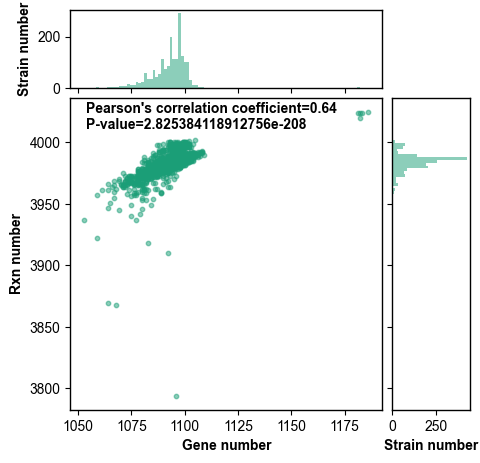

In [37]:
# calculate pearson correlation coefficient with df_ssGEM_result['gene_numb']&df_ssGEM_result['rxn_numb']
pearson_coef,p_value=stats.pearsonr(df_ssGEM_result['gene_numb'],df_ssGEM_result['rxn_numb'])
print('The pearson correlation coefficient is',pearson_coef,'with a P-value of P =', p_value)
fig=plt.figure(figsize=(5,5))
# plt.style.use('seaborn-paper')

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# add main scatter plot and 2 sub hist plot
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# remove sub plots x and y ticks
ax_histx.tick_params(axis='x',labelbottom=False)
ax_histy.tick_params(axis='y',labelleft=False)

# plot scatter plot
ax.scatter(df_ssGEM_result['gene_numb'],df_ssGEM_result['rxn_numb'],s=10,c=colors_set[0],alpha=0.5)
ax.set_xlabel('Gene number',fontdict=label_fontdict)
ax.set_ylabel('Rxn number',fontdict=label_fontdict)
# text pcc value 
ax.text(x=0.05,y=0.95,s='Pearson\'s correlation coefficient='+str(round(pearson_coef,2)),transform=ax.transAxes,fontdict=label_fontdict)
# text p-value
ax.text(x=0.05,y=0.9,s='P-value='+str(p_value),transform=ax.transAxes,fontdict=label_fontdict)

# plot hist plot
ax_histx.hist(df_ssGEM_result['gene_numb'],bins=100,color=colors_set[0],alpha=0.5)
ax_histx.set_ylabel('Strain number',fontdict=label_fontdict)
ax_histy.hist(df_ssGEM_result['rxn_numb'],bins=100,orientation='horizontal',color=colors_set[0],alpha=0.5)
ax_histy.set_xlabel('Strain number',fontdict=label_fontdict)
plt.show()
fig.savefig("figures/output/additional3_ssGEM_evaluation.svg",dpi=400,bbox_inches="tight",transparent=True)

- additional figure. Biomass Yield - strain type

C:\Users\wangh\AppData\Local\Temp\ipykernel_25680\1534438828.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_ssGEM_result[df_ssGEM_result['aerobic_growth']>0],y='Biomass Yield',x='type',ax=ax,linewidth=0.5,order=clades_order,palette=sns.color_palette("hls", 16))


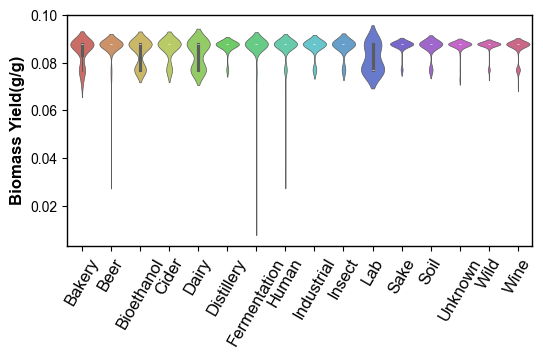

In [44]:
# plot Biomass Yield boxplot for different types of ssGEMs
fig,ax=plt.subplots(figsize=(6,3))
# plt.style.use('seaborn-paper')

gluc_uptake=1 # mmol/gDW/h
df_ssGEM_result['Biomass Yield']=df_ssGEM_result['aerobic_growth']/gluc_uptake

sns.violinplot(data=df_ssGEM_result[df_ssGEM_result['aerobic_growth']>0],y='Biomass Yield',x='type',ax=ax,linewidth=0.5,order=clades_order,palette=sns.color_palette("hls", 16))
# sns.boxplot(data=df_ssGEM_result[df_ssGEM_result['aerobic_growth']>0],y='Biomass Yield',x='type',ax=ax,showfliers=False)
# add points
# sns.swarmplot(data=df_ssGEM_result[df_ssGEM_result['aerobic_growth']>0],y='Biomass Yield',x='type',ax=ax,color='black',size=2)
# set y axis label
ax.set_ylabel('Biomass Yield(g/g)',fontsize=12,fontdict=label_fontdict)
# rotate x axis ticklabels
ax.tick_params(axis='x',rotation=60,labelsize=12)
# set x axis label
ax.set_xlabel('')

plt.show()
fig.savefig("figures/output/additional3_biomassYield.svg",dpi=400,bbox_inches="tight",transparent=True)